In [2]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [3]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("*.cali"))

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:09<00:00, 28.22it/s]


View Calltree

In [4]:
print(tk.tree(metric_column="Min time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.151 main
└─ 1.146 main
   ├─ 0.499 comm
   │  ├─ 0.033 MPI_Barrier
   │  ├─ 0.000 MPI_Comm_dup
   │  ├─ 0.000 MPI_Finalize
   │  ├─ 0.000 MPI_Finalized
   │  ├─ 0.000 MPI_Init
   │  └─ 0.000 MPI_Initialized
   ├─ 0.600 comp_large
   │  ├─ 0.092 comm
   │  │  └─ 0.091 comm_large
   │  │     ├─ 0.052 MPI_Recv
   │  │     └─ 0.000 MPI_Send
   │  └─ 0.447 comp_large
   ├─ 0.003 correctness_check
   └─ 0.004 data_init_runtime

Legend (Metric: Min time/rank Min: 0.00 Max: 1.15 indices: {'profile': 5360418})
█ 1.04 - 1.15
█ 0.81 - 1.04
█ 0.58 - 0.81
█ 0.35 - 0.58
█ 0.12 - 0.35
█ 0.00 - 0.12

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  2186672758   
                                                          random            3976550619   
                                                          reverse           1688588294   
                                                          sorted            2178043862   
                                               262144     1_perc_perturbed  3403630889   

                                                                            nid  \
node                                 num_procs input_size input_type              
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  1.0   
                                                          random            1.0   
                                                          reverse           1.0   
                                                          sorted            1.0   
                                               262144     1_perc_perturbed  1.0   

                                                                             spot.channel  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  regionprofile   
                                                          random            regionprofile   
                                                          reverse           regionprofile   
                                                          sorted            regionprofile   
                                               262144     1_perc_perturbed  regionprofile   

                                                                            Min time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.286809   
                                                          random                 0.308806   
                                                          reverse                0.285525   
                                                          sorted                 0.309867   
                                               262144     1_perc_perturbed       0.297077   

                                                                            Max time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.286810   
                                                          random                 0.310044   
                                                          reverse                0.285563   
                                                          sorted                 0.309872   
                                               262144     1_perc_perturbed       0.297700   

                                                                            Avg time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.286809   
                                                          random                 0.309425   
                                                          reverse                0.285544   
                                                          sorted                 0.309870   
                                               262144     1_perc_perturbed       0.297389   

                                                                            Total time  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed    

In [9]:
processes = [2,4,8,16,32,64,128,256,512,1024]

In [10]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [11]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
            
    )
    plot.set_xticks(processes)
    plot.set_xticklabels(processes)
    return plot

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.309867       0.309872       0.309870
4               0.356942       0.358774       0.358226
8               0.588098       0.590410       0.589172
16              0.582325       0.750997       0.666352
32              0.578516       0.586513       0.582704
64              0.675443       0.741416       0.711289
128             2.924468       3.164274       3.088181
256             3.869201       4.029586       3.916962
512             9.868960      10.719973      10.225783
1024            9.242080      10.535868       9.574379

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.304630       0.304632       0.304631
4               0.351727       0.353546       0.352996
8               0.578555       0.580886       0.579543
16              0.577003       0.7

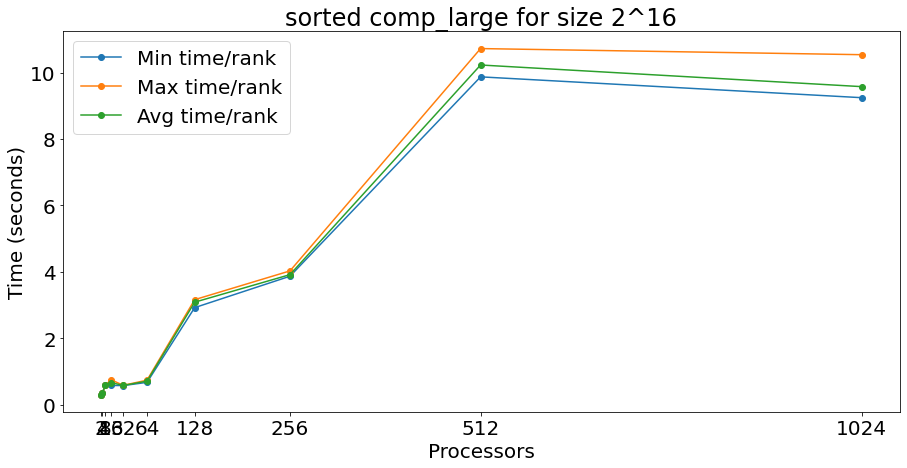

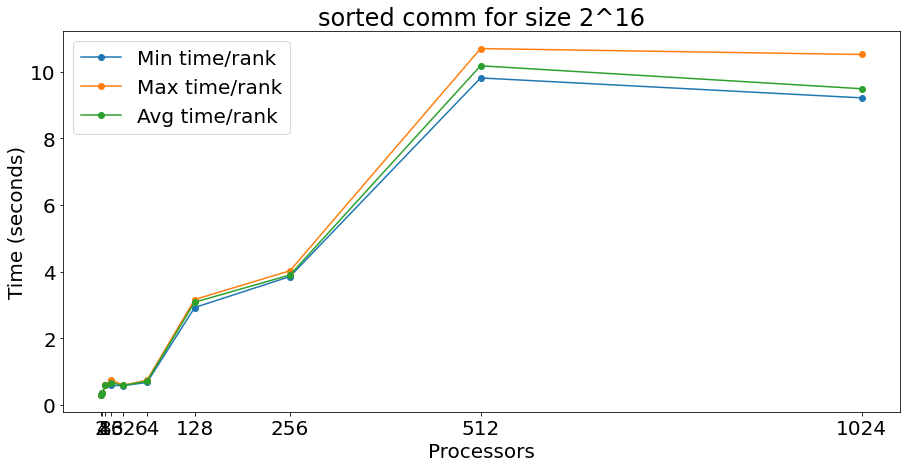

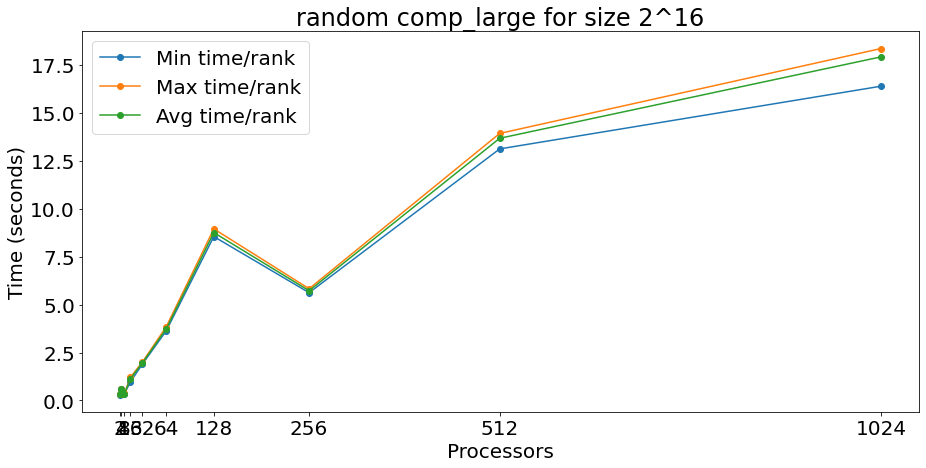

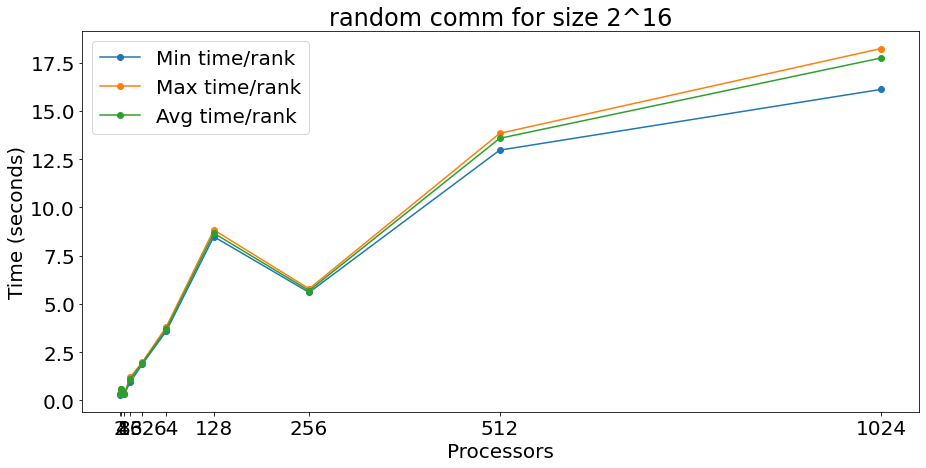

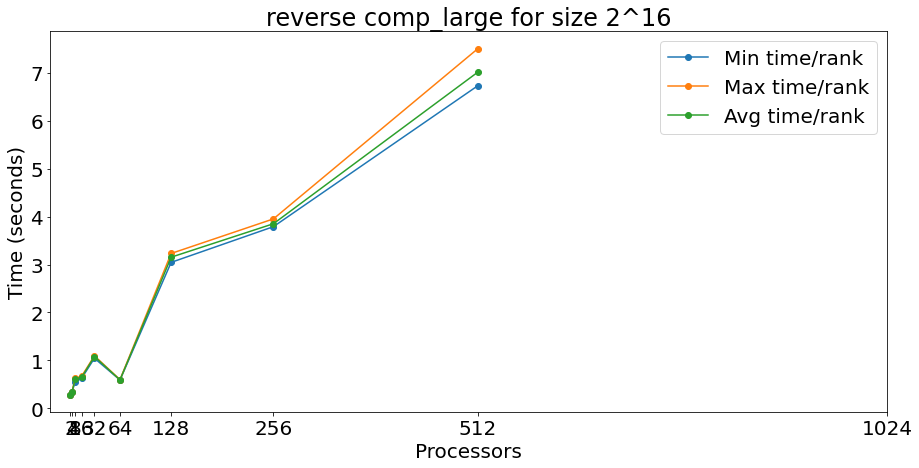

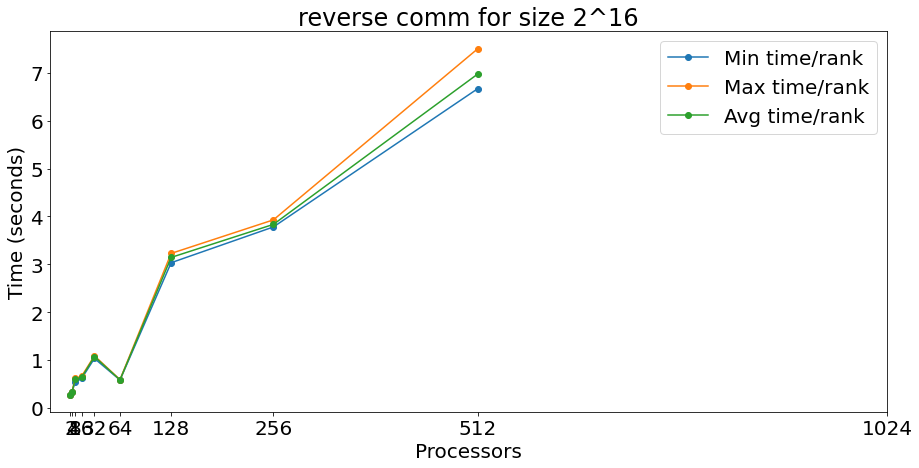

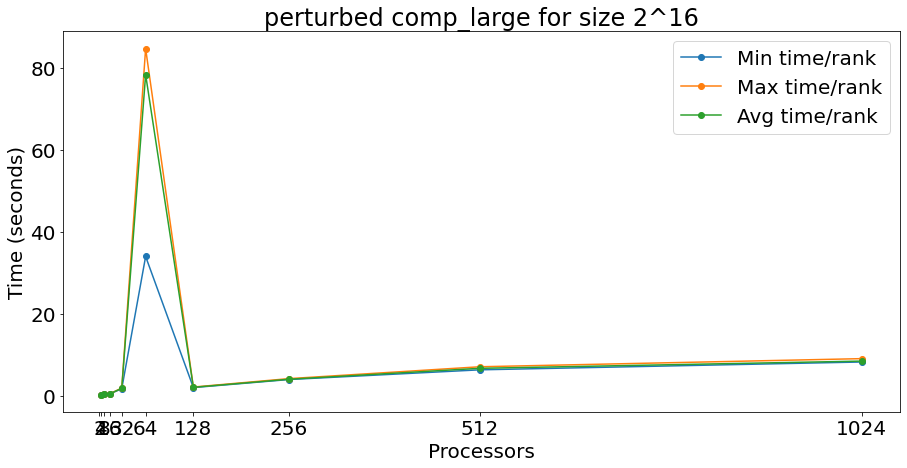

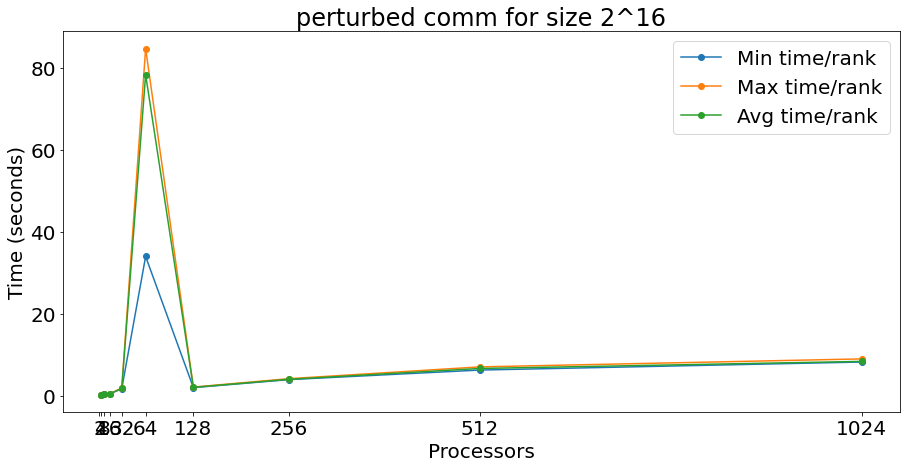

In [12]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(65536, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()

                            # Split the dataframe into two parts for comp_large and comm
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^16",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.320476       0.321532       0.321004
4               0.399616       0.400516       0.399909
8               0.487775       0.488445       0.488322
16              0.621912       0.660682       0.641960
32              0.677388       0.722830       0.708244
64              0.589687       0.597755       0.593842
128             1.972604       2.049328       1.995552
256             4.459588       4.767627       4.647462
512             6.936347       7.722320       7.245973
1024            8.467401       9.321700       8.662866

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.315238       0.316291       0.315765
4               0.394388       0.395309       0.394691
8               0.482563       0.483242       0.483107
16              0.612088       0.6

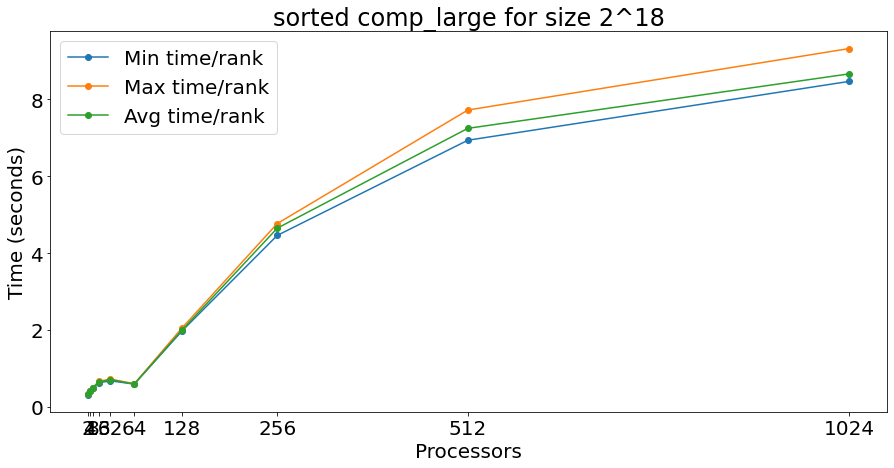

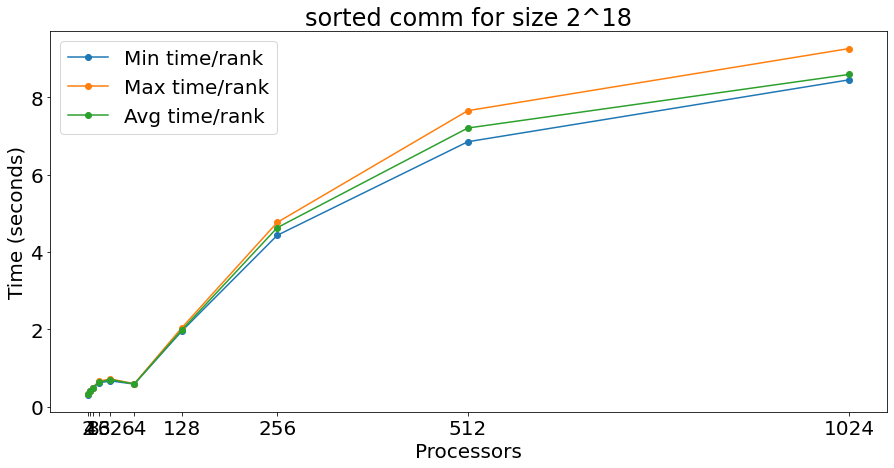

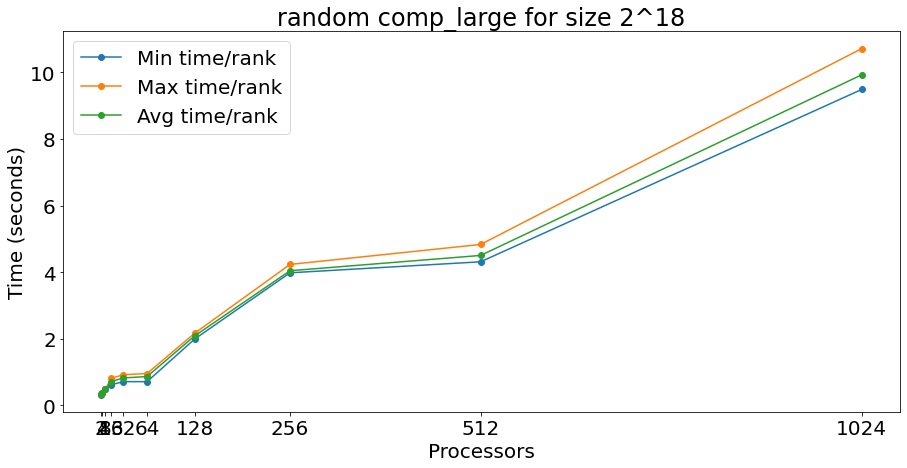

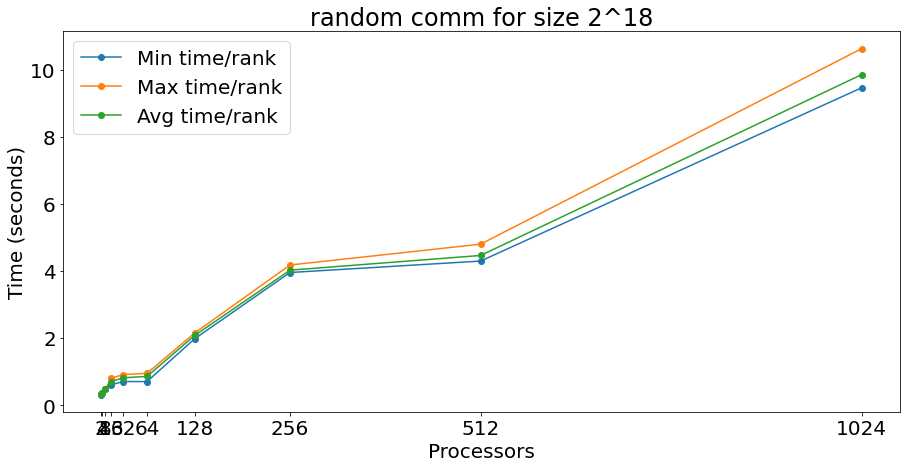

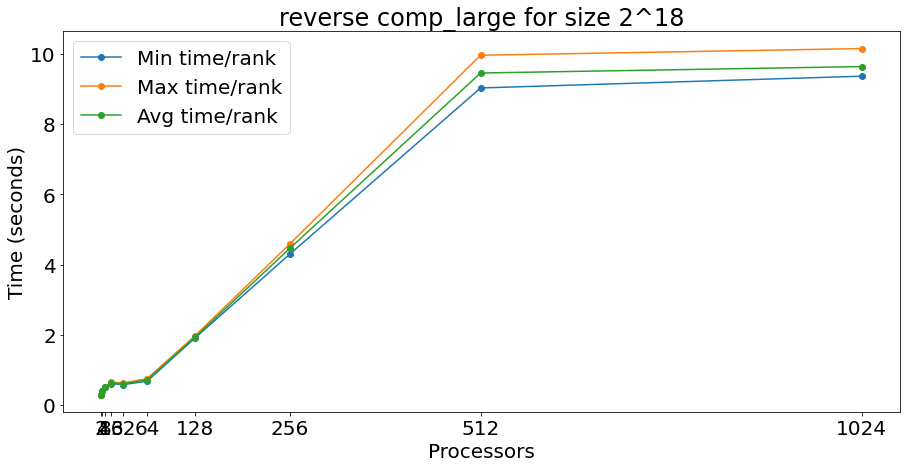

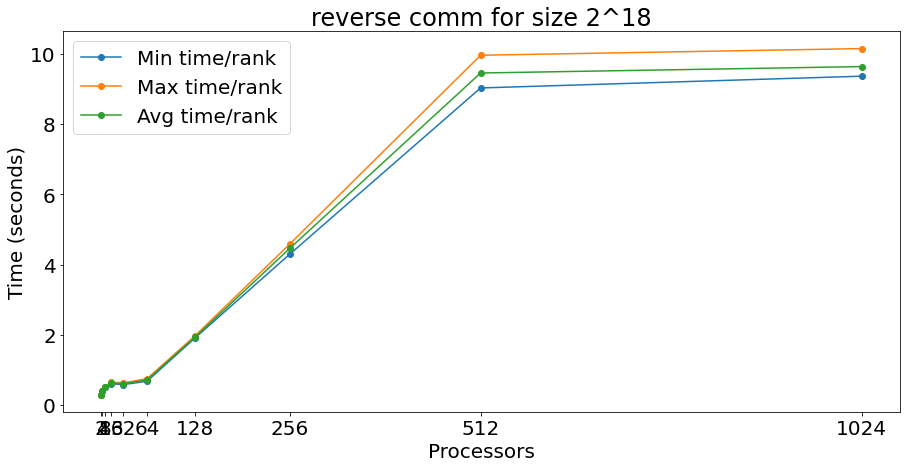

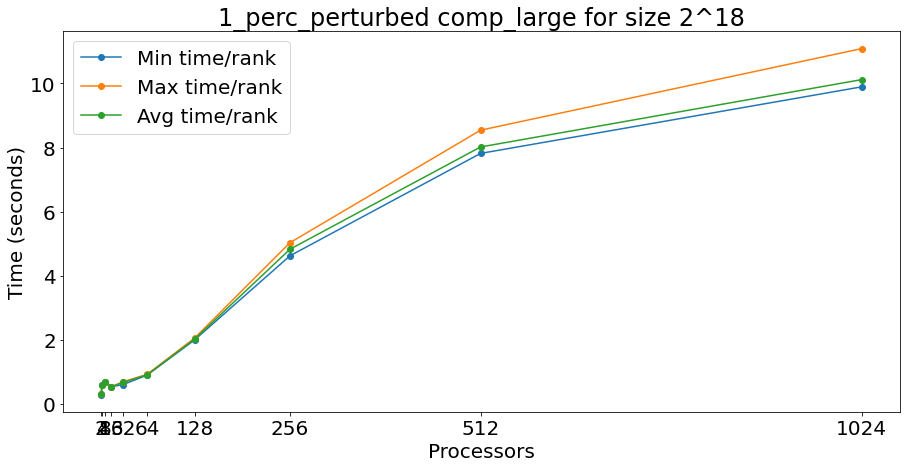

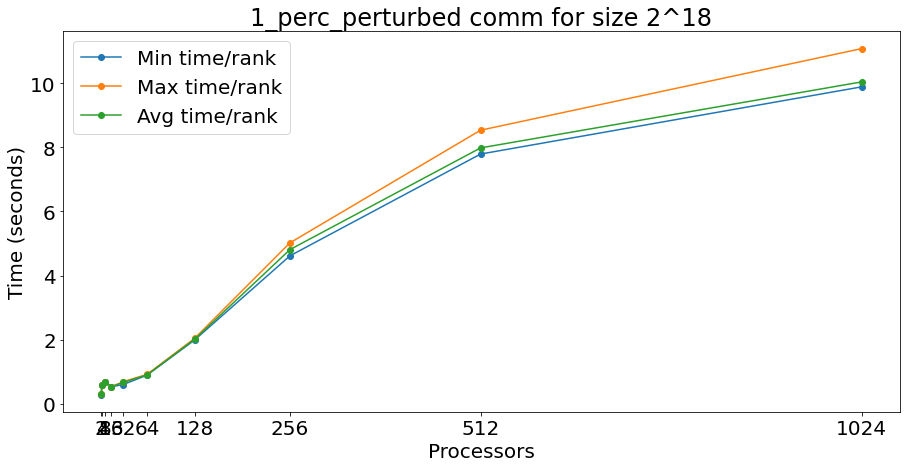

In [13]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(262144, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "1_perc_perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()
                            
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                if input_type == 'reverse':
                                    midpoint -= 1
                                    wc_func_df = wc_func_df.iloc[:midpoint]
                                else:
                                    wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                if input_type == 'reverse':
                                    wc_func_df = wc_func_df.iloc[0:midpoint-1]
                                else:
                                    wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^18",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.350924       0.352512       0.351718
4               0.429455       0.429522       0.429481
8               0.521241       0.521738       0.521637
16              0.559674       0.581352       0.570549
32              0.714937       0.760605       0.746615
64              0.605416       0.613543       0.609006
128             3.158692       3.305297       3.247431
256             3.926429       4.061366       3.988201
512             3.891517       4.448169       4.003135
1024           11.070615      12.522247      11.848263

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.345716       0.347285       0.346501
4               0.424243       0.424308       0.424269
8               0.516035       0.516519       0.516426
16              0.554375       0.5

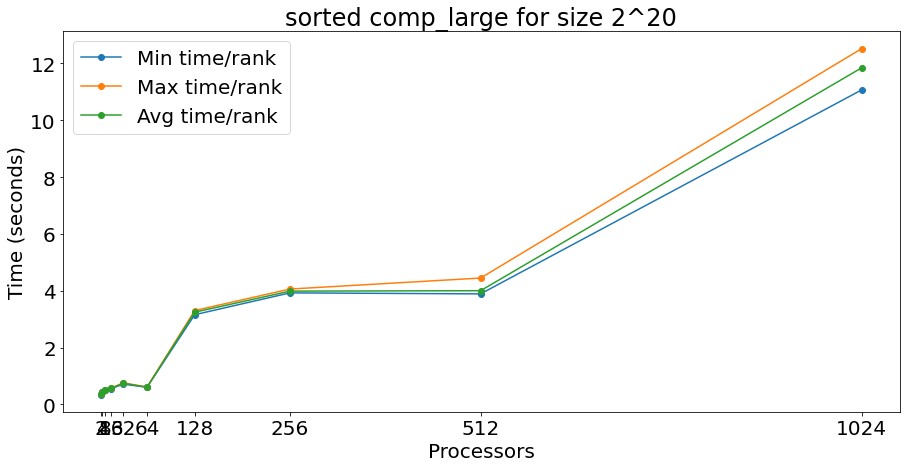

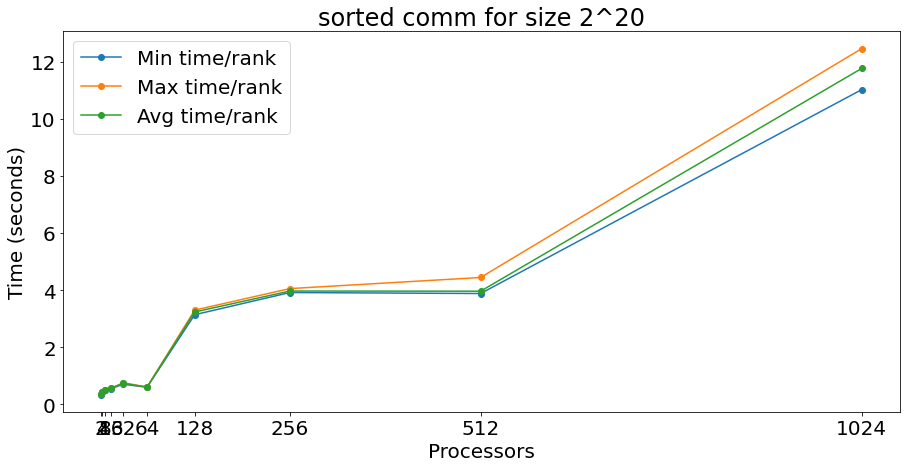

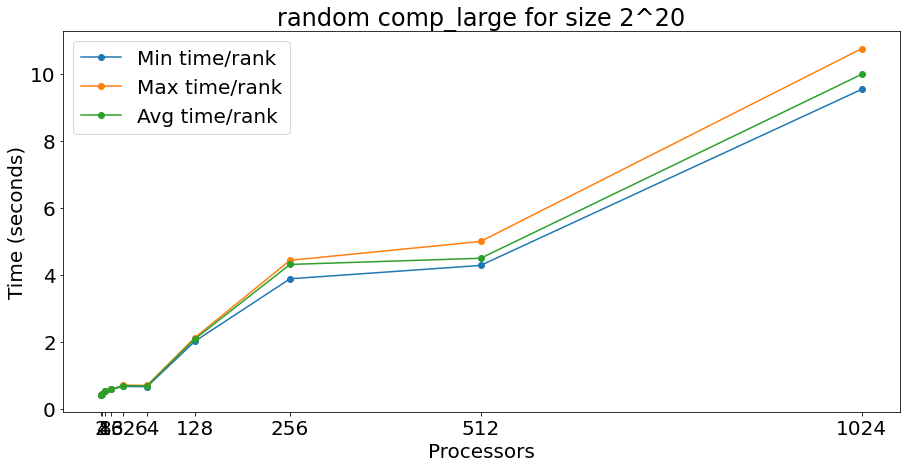

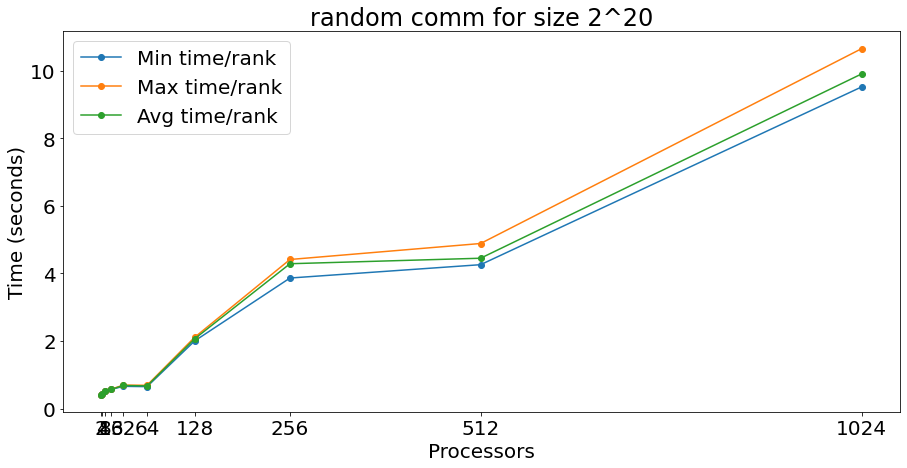

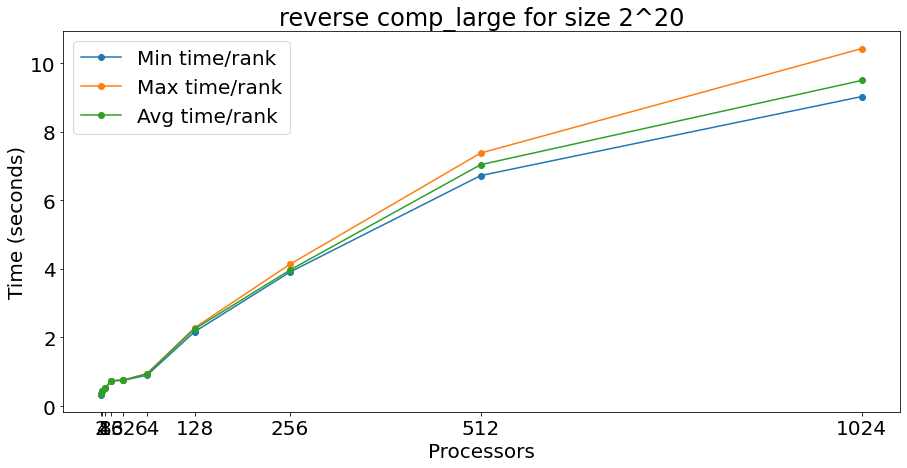

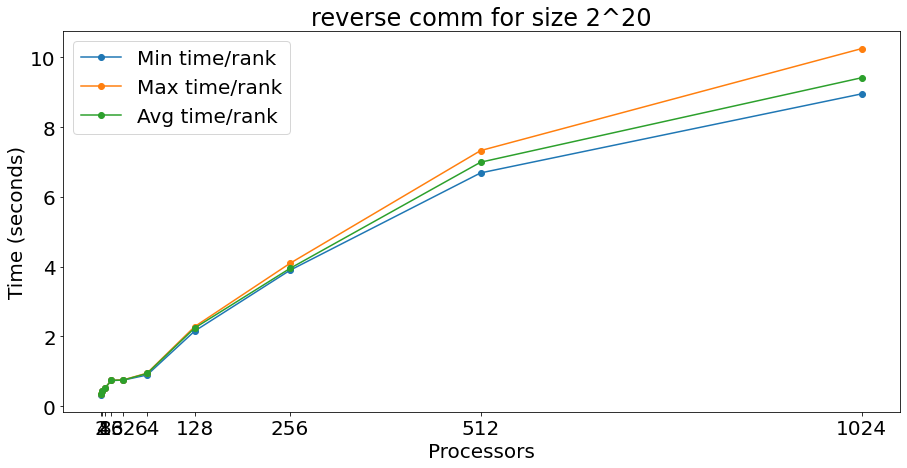

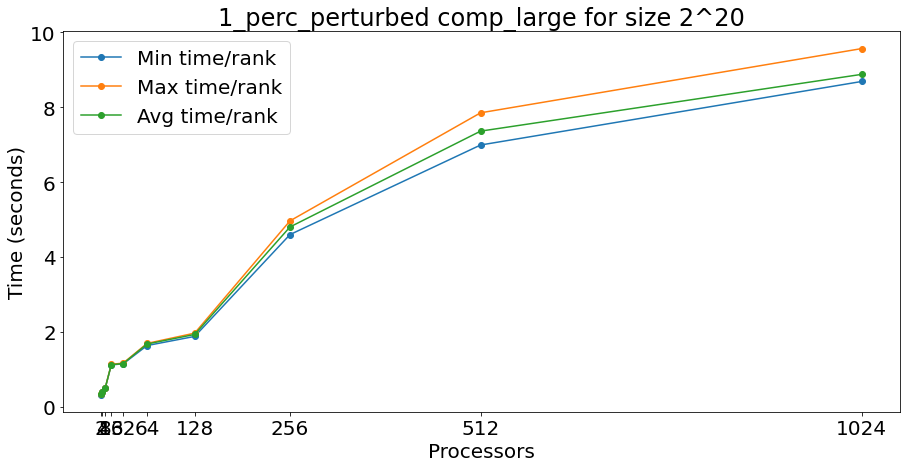

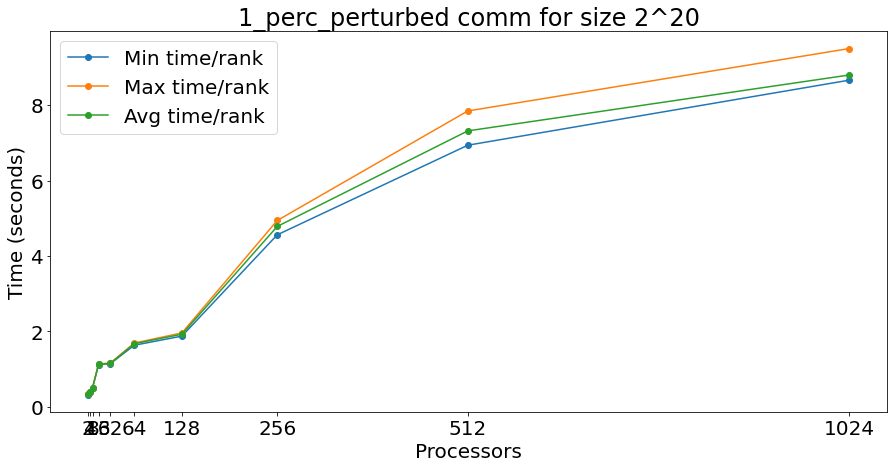

In [14]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(1048576, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "1_perc_perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()

                            # Split the dataframe into two parts for comp_large and comm
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^20",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.510101       0.510124       0.510113
4               0.616623       0.616701       0.616665
8               0.673224       0.673315       0.673264
16              0.682349       0.686061       0.684431
32              0.680733       0.686899       0.683851
64              1.737019       1.803138       1.772637
128             2.899826       2.972326       2.926431
256             4.403086       4.708427       4.566693
512             3.793587       4.134580       3.915220
1024            8.607083       9.321477       8.798853

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               0.504887       0.504904       0.504896
4               0.611397       0.611469       0.611422
8               0.667995       0.668086       0.668044
16              0.677133       0.6

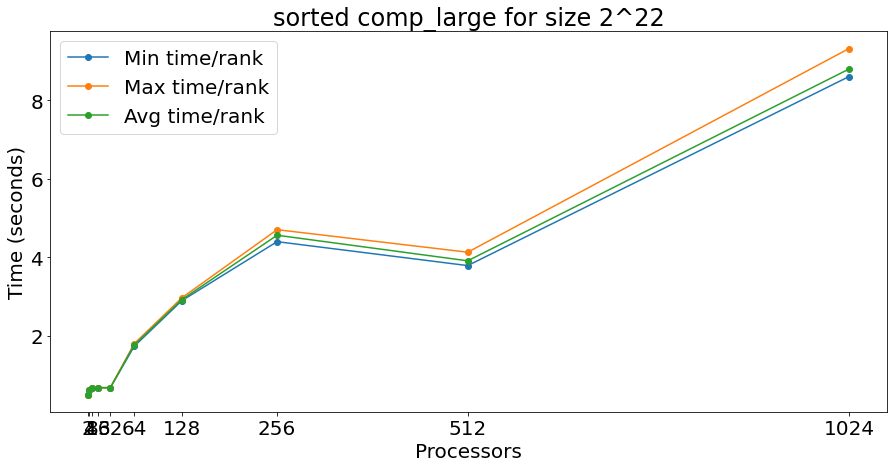

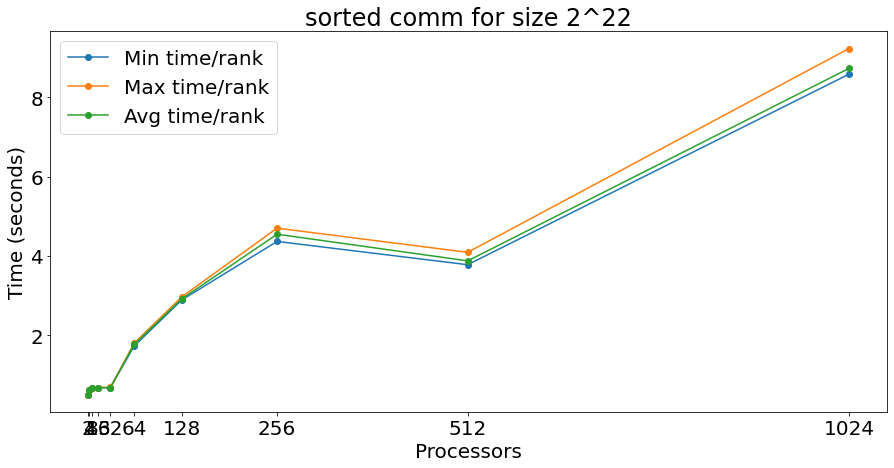

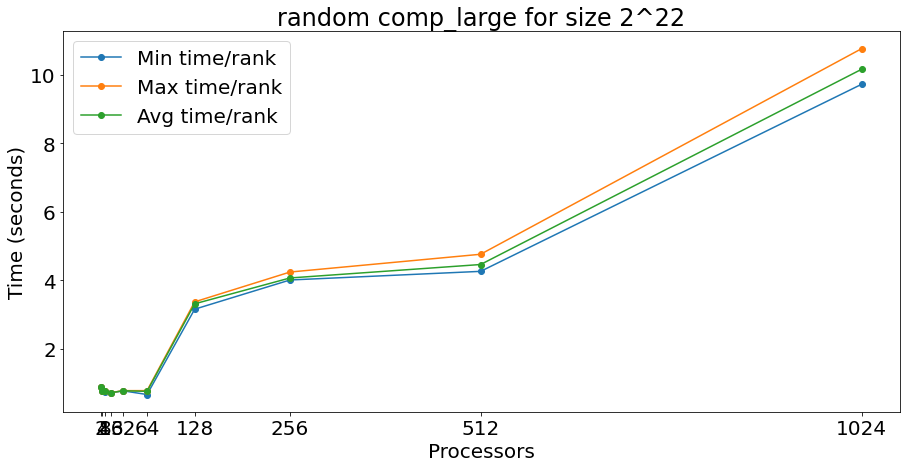

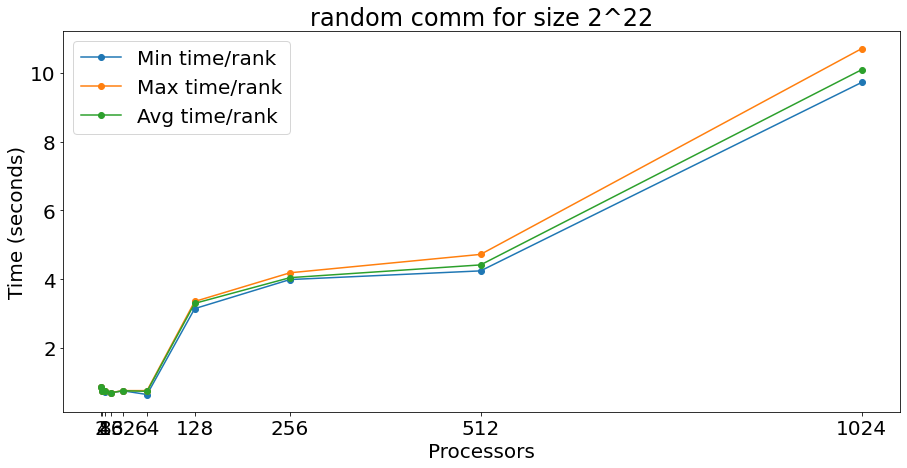

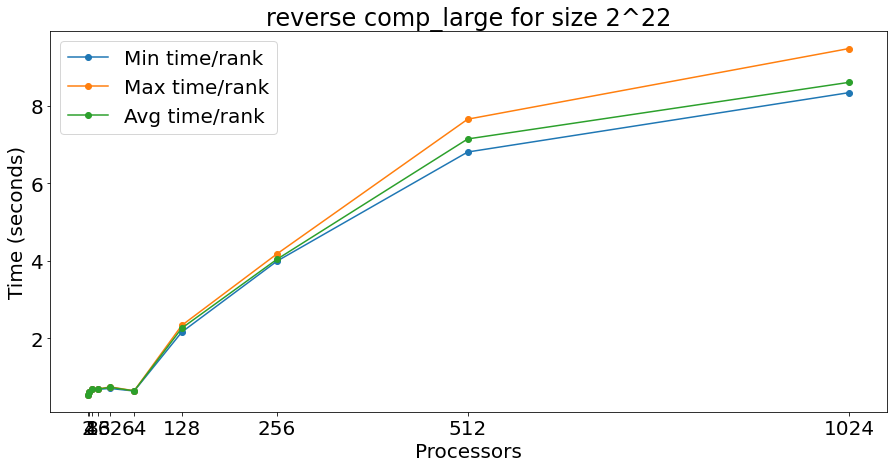

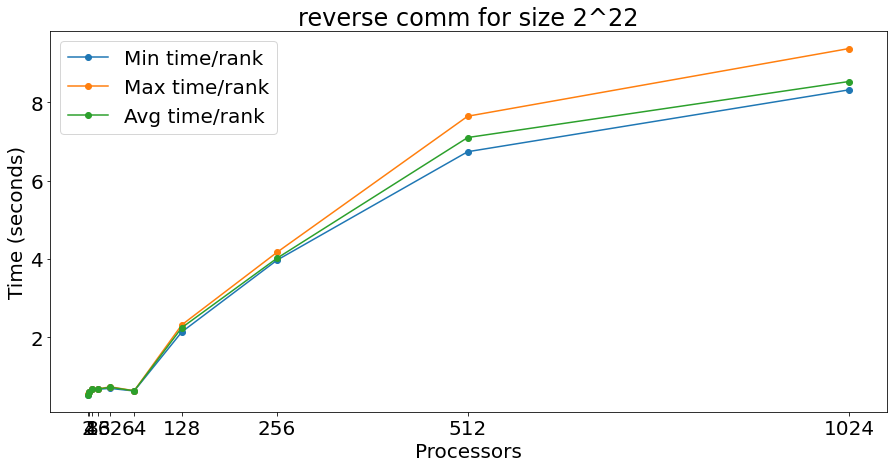

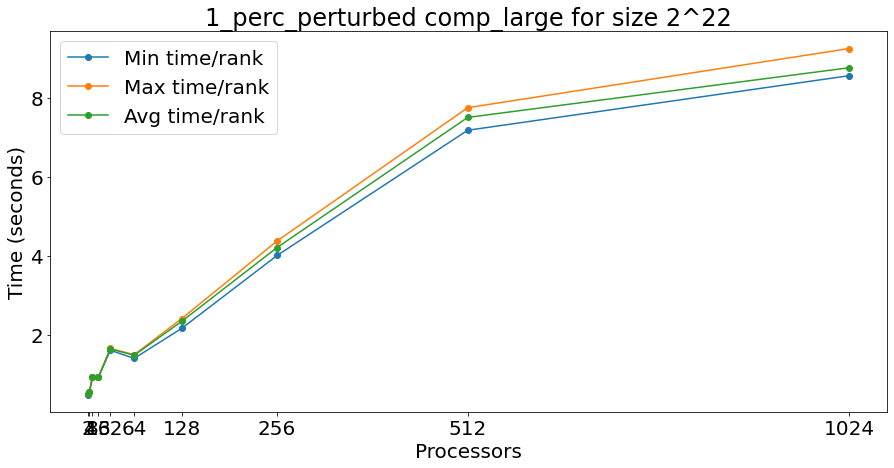

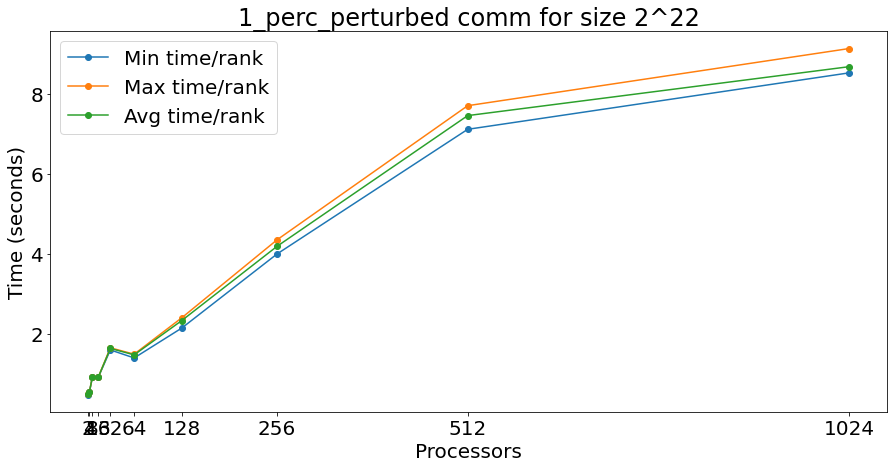

In [15]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(4194304, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "1_perc_perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()

                            # Split the dataframe into two parts for comp_large and comm
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^22",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               1.165433       1.165479       1.165456
4               1.277420       1.277433       1.277428
8               2.125989       2.127083       2.126656
16              1.151124       1.154051       1.152541
32              1.045893       1.051637       1.048892
64              1.132135       1.199854       1.171127
128             2.215215       2.295678       2.248457
256             4.302027       4.592037       4.446719

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               1.160231       1.160277       1.160254
4               1.272174       1.272193       1.272183
8               2.116175       2.117550       2.117028
16              1.145816       1.148856       1.147304
32              1.040654       1.046403       1.043666
64              1.122528       1.1

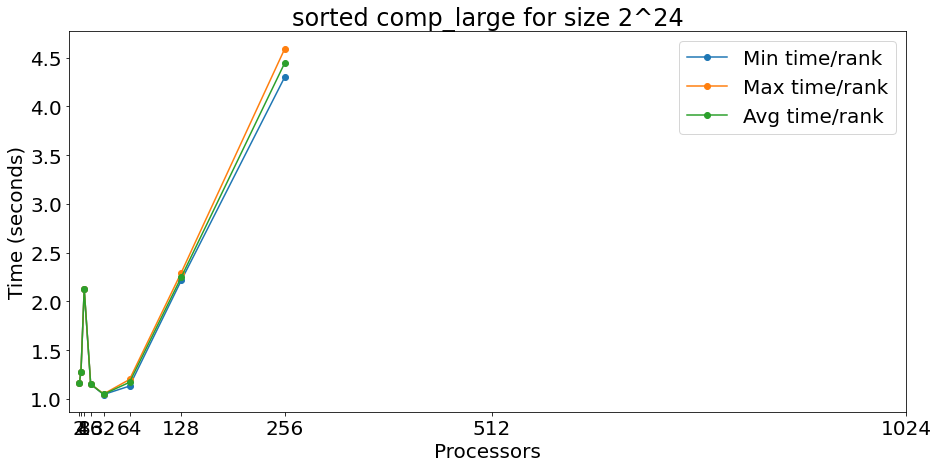

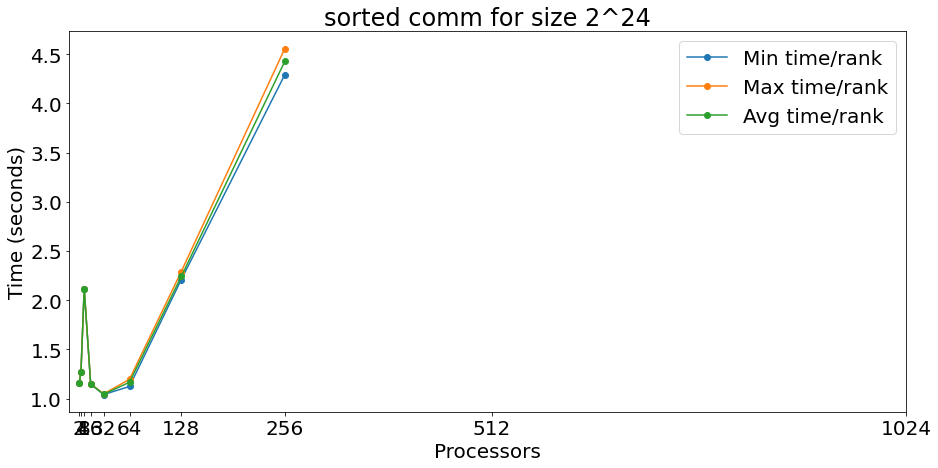

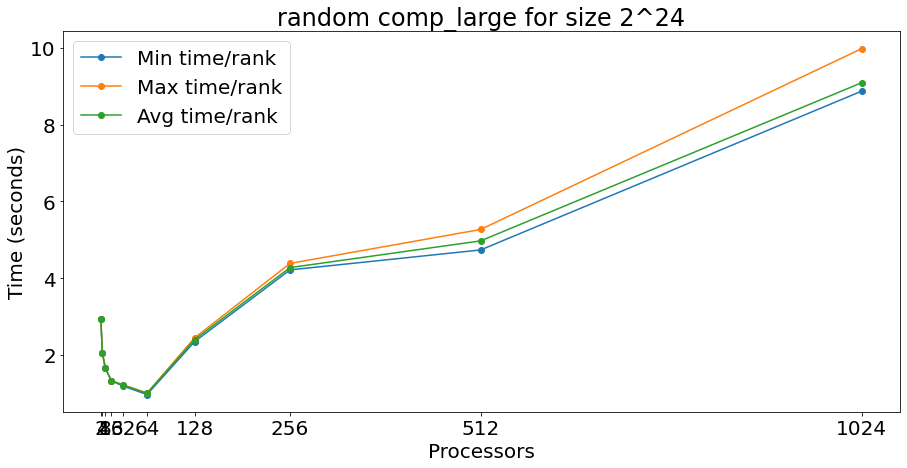

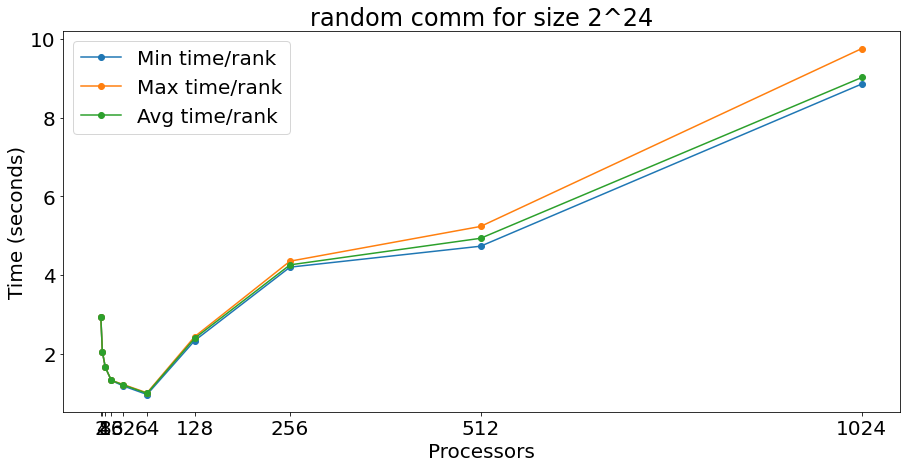

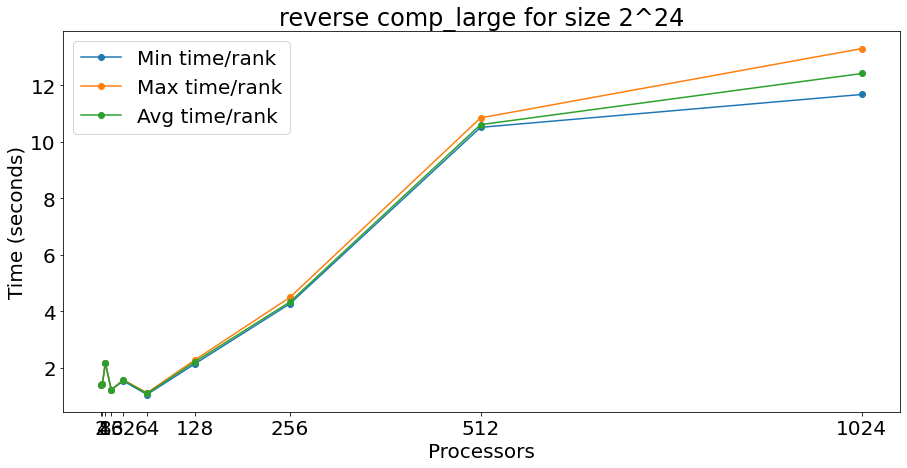

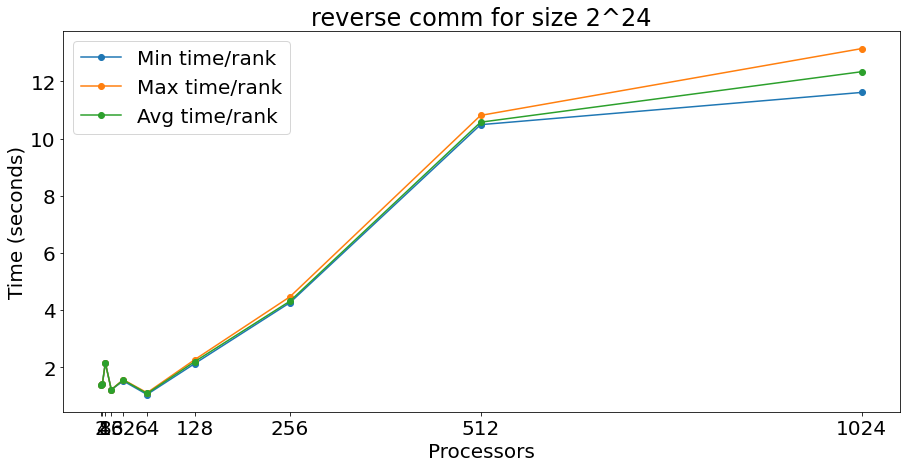

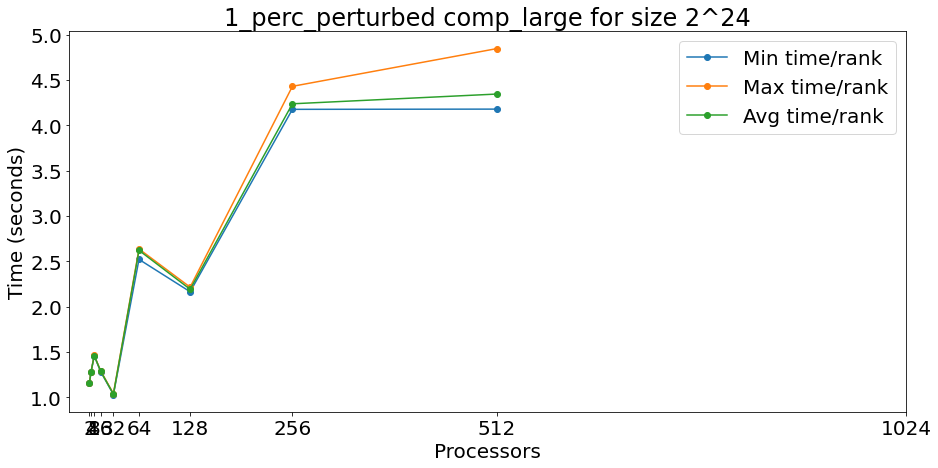

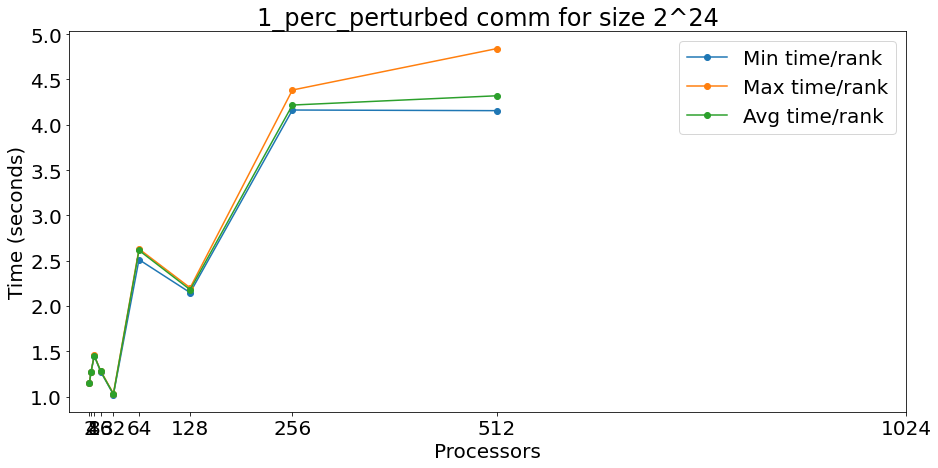

In [16]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(16777216, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "1_perc_perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()

                            # Split the dataframe into two parts for comp_large and comm
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^24",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               4.059822       4.061508       4.060665
4               4.192818       4.192903       4.192857
8               3.866077       3.870667       3.868684
16              3.431099       3.433083       3.432181
32              2.639894       2.647752       2.643449
64              1.805159       1.815428       1.810535
128             3.260612       3.339866       3.309604
256             7.275540       7.617418       7.415636
512            10.427013      11.002550      10.710914
1024           11.481435      12.687996      11.721396

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2               4.059822       4.061508       4.060665
4               4.192818       4.192903       4.192857
8               3.866077       3.870667       3.868684
16              3.431099       3.4

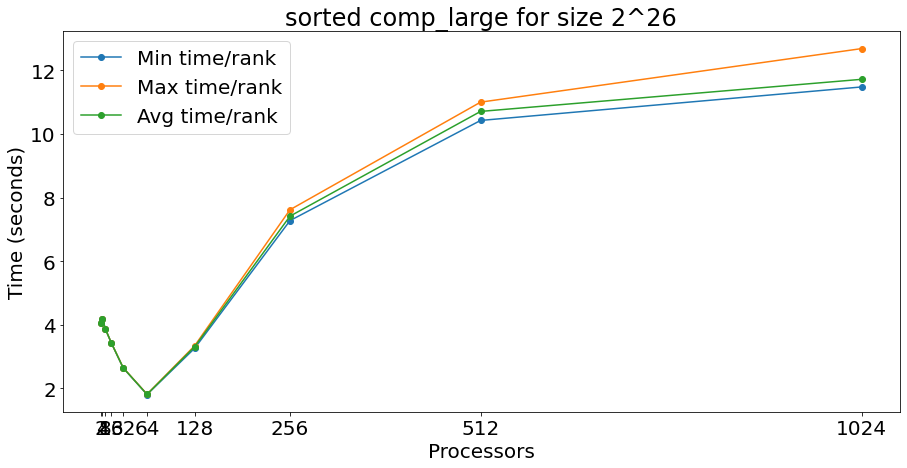

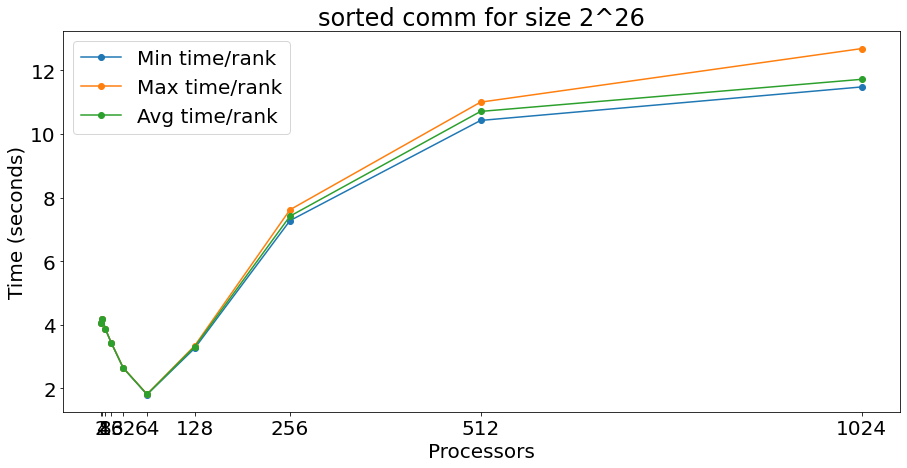

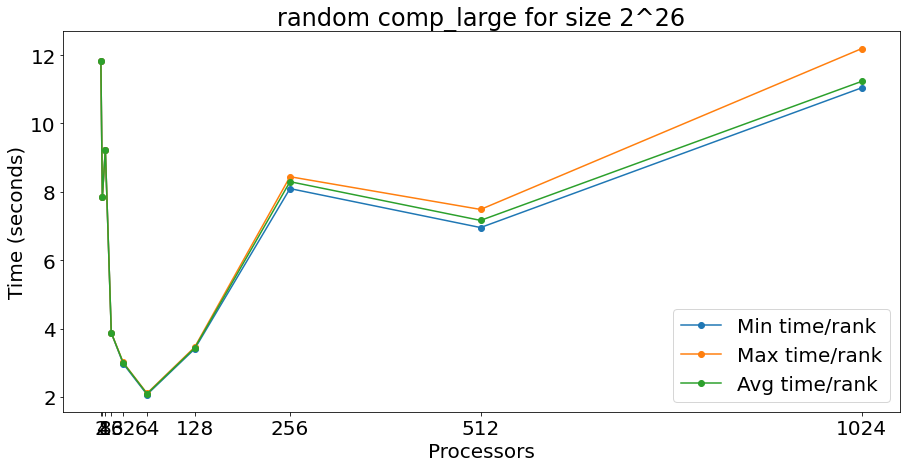

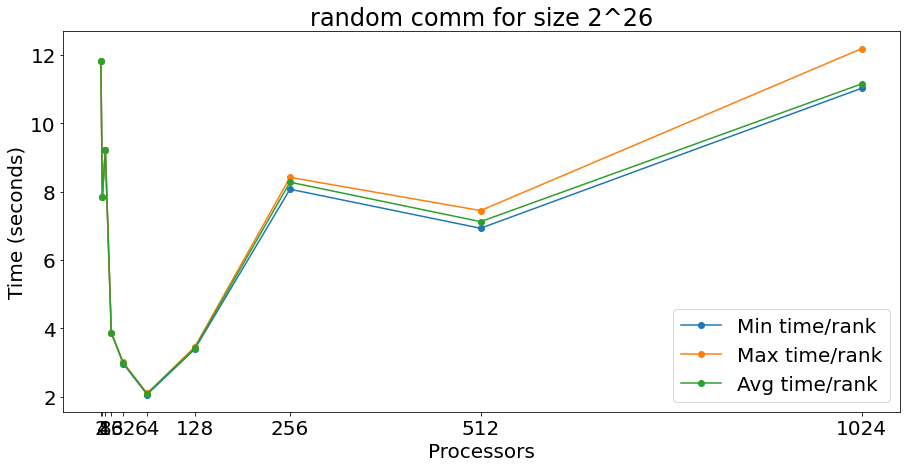

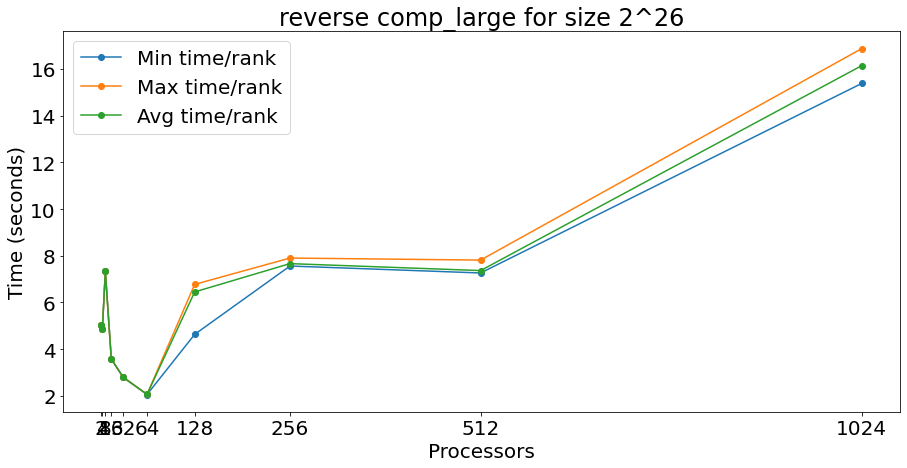

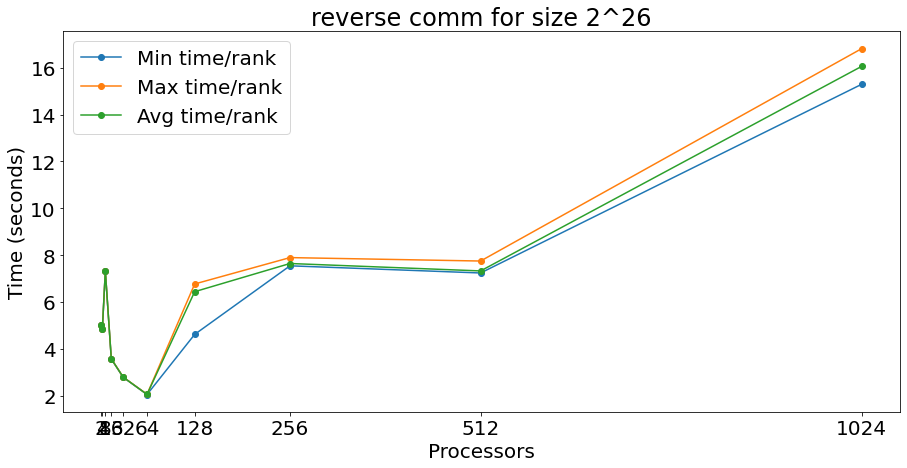

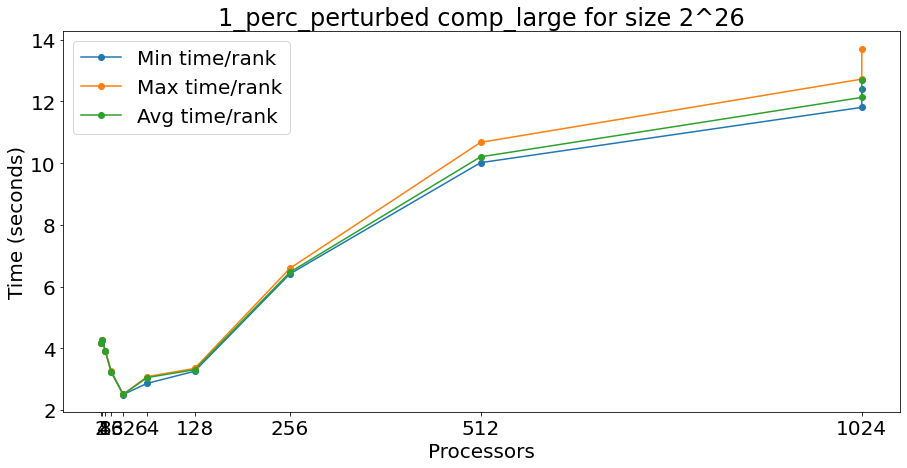

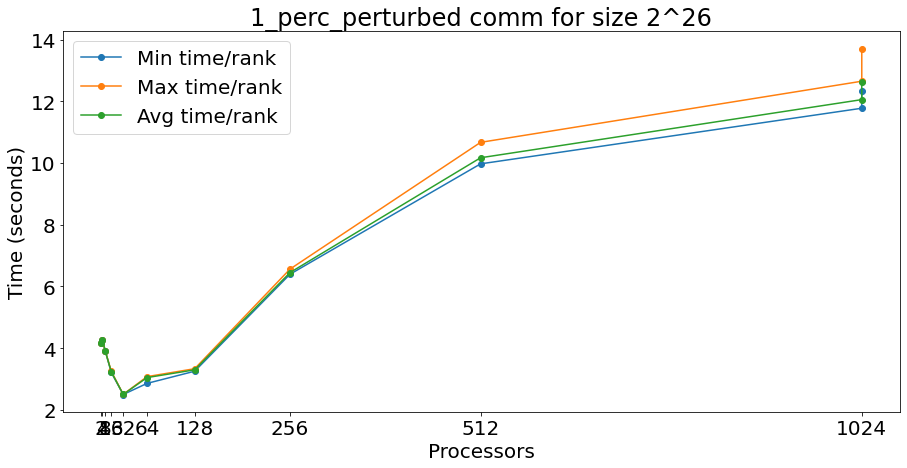

In [17]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(67108864, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "1_perc_perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()
                            
                            if input_type == 'sorted':
                                # Remove the second occurrence of num_procs == 512 if it exists
                                idx_512 = wc_func_df[wc_func_df['num_procs'] == 512].index
                                if len(idx_512) > 1:
                                    wc_func_df = wc_func_df.drop(idx_512[1])
                            
                            # Split the dataframe into two parts for comp_large and comm
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                if input_type == 'sorted':
                                    midpoint -= 1
                                    wc_func_df = wc_func_df.iloc[:midpoint]
                                else:
                                    wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                if input_type == 'sorted':
                                    wc_func_df = wc_func_df.iloc[0:midpoint-1]
                                else:
                                    wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^26",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )

sorted comp_large
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2              16.470158      16.470593      16.470375
4              17.064119      17.064228      17.064180
8              15.199926      15.201454      15.200652
16             11.926236      11.930299      11.928789
32              8.678070       8.686404       8.680744
64              6.620091       6.915590       6.868459
128             8.469229       8.774168       8.711380
256            11.701982      11.854071      11.764257
512            15.821790      16.189472      15.917481
1024           22.737218      23.592797      22.928931

sorted comm
           Min time/rank  Max time/rank  Avg time/rank
num_procs                                             
2              16.464823      16.465379      16.465101
4              17.058910      17.058999      17.058955
8              15.194697      15.196212      15.195419
16             11.920989      11.9

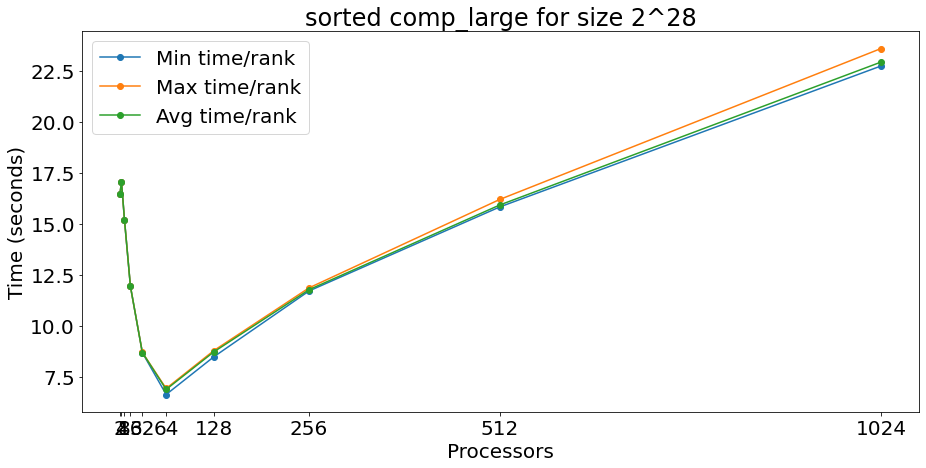

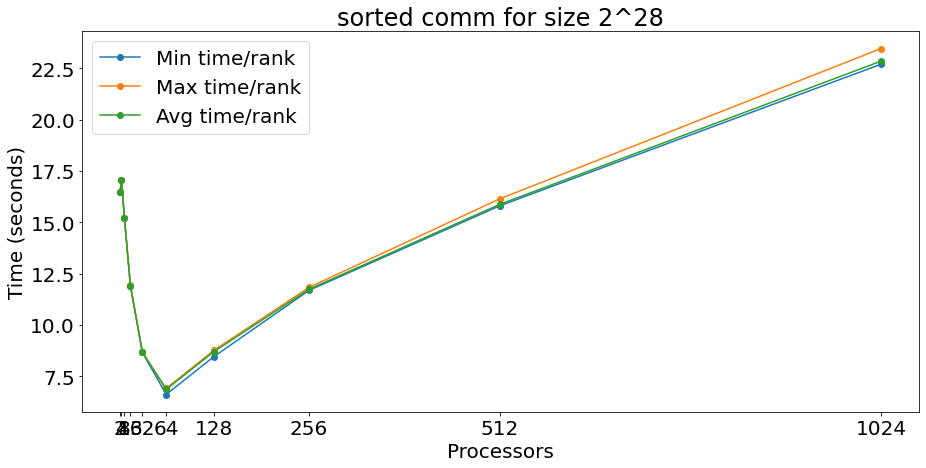

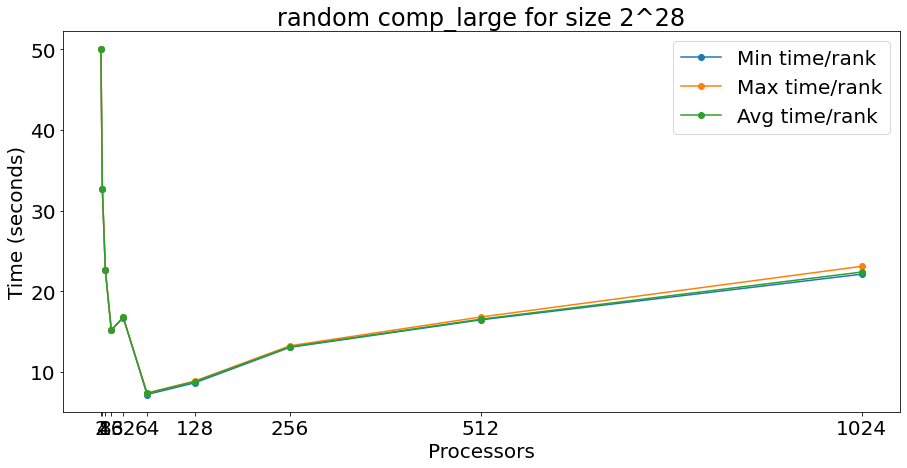

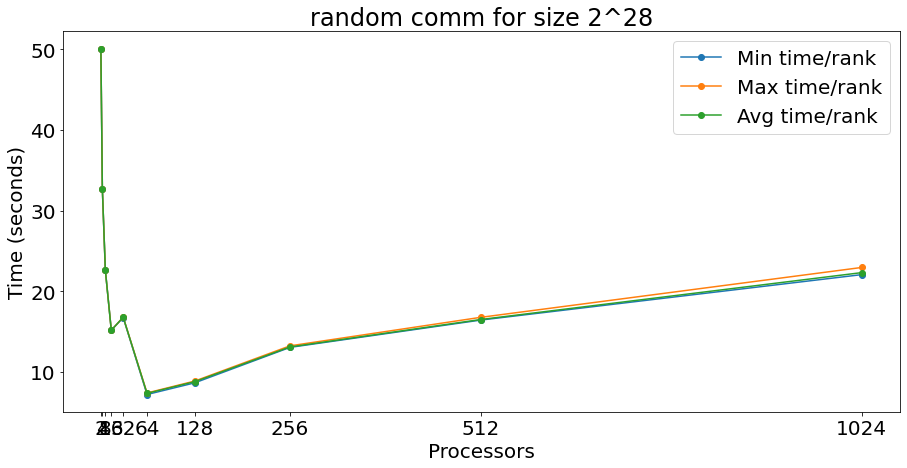

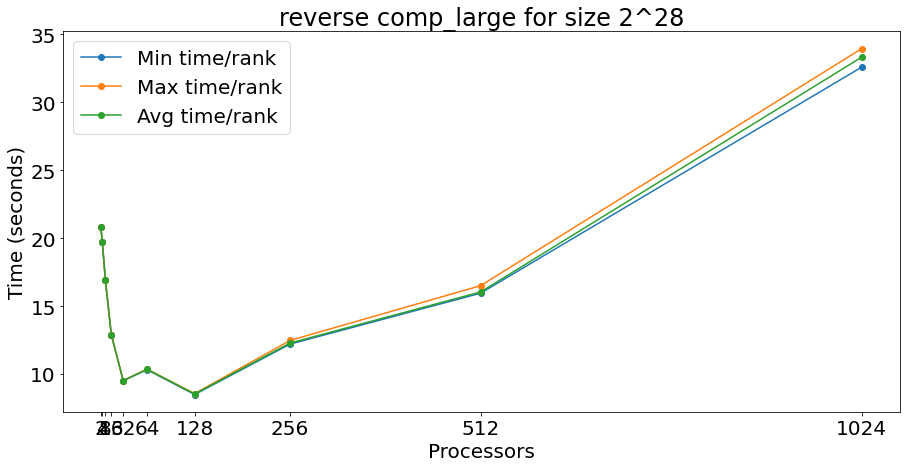

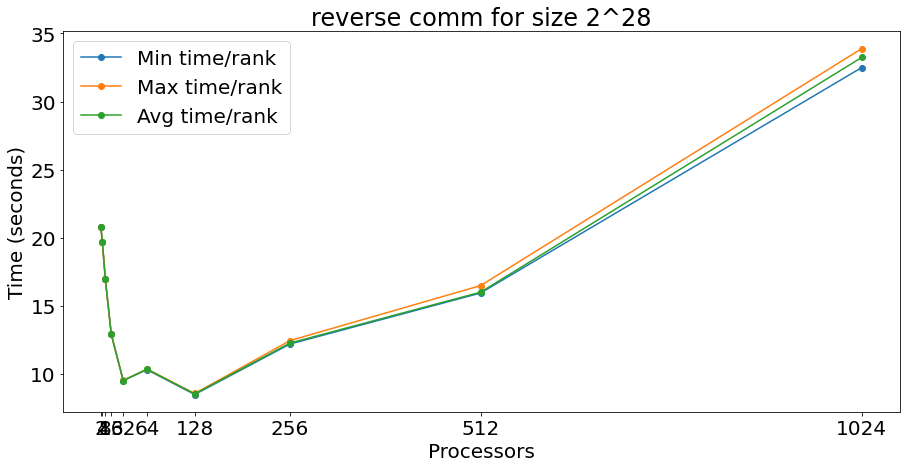

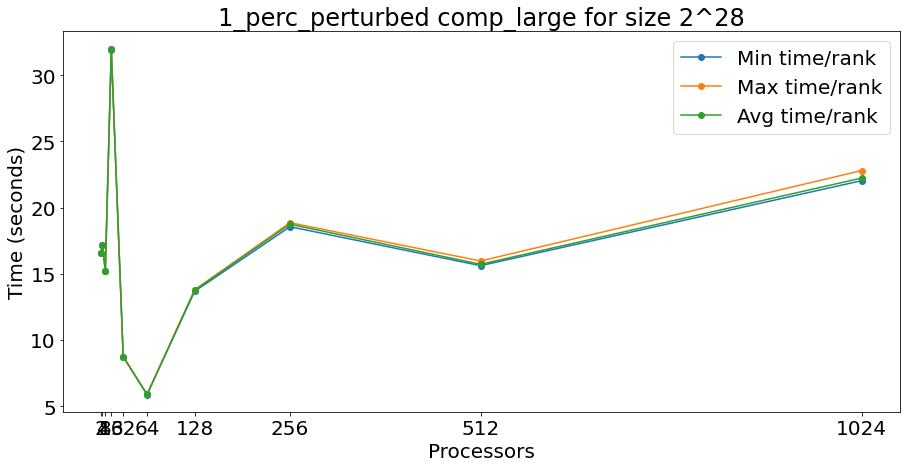

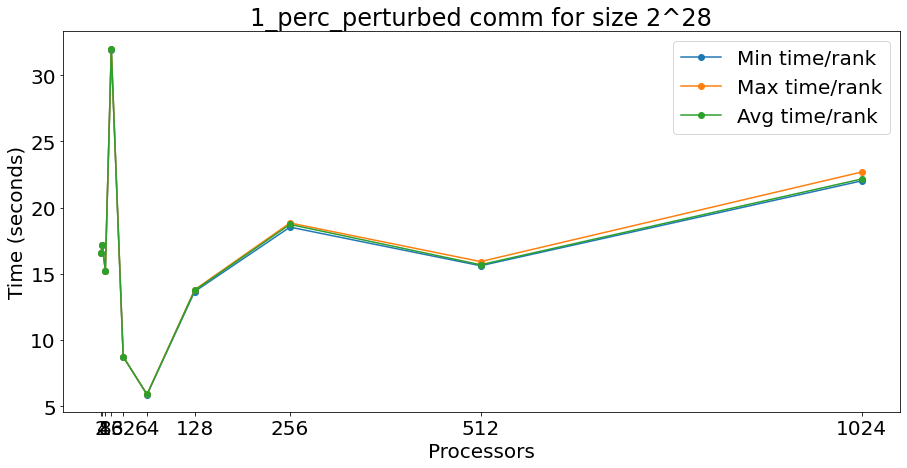

In [18]:
    for node in tk.graph.traverse():
        if node.frame["name"] == "main":
            # Move into the secondary 'main' function before proceeding
            for child in node.children:
                if child.frame["name"] == "main":
                    wc_df = tk.dataframe.loc[tk.dataframe.index.get_level_values('node').map(
                        lambda x: x.frame["name"] == 'main'
                    )]
                    
                    # Filter the dataframe for the specified input size
                    wc_df = wc_df.xs(268435456, level='input_size')
                    # Define the input types and functions to be plotted
                    input_types = ["sorted", "random", "reverse", "1_perc_perturbed"]
                    functions = ["comp_large", "comm"]
            
                    # Iterate over each input type and plot the respective data
                    for input_type in input_types:
                        for func in functions:
                            # Extract data for the input type and function
                            wc_func_df = wc_df.xs(input_type, level="input_type")
                            wc_func_df = wc_func_df.reset_index()

                            # Split the dataframe into two parts for comp_large and comm
                            midpoint = len(wc_func_df) // 2
                            if func == 'comp_large':
                                wc_func_df = wc_func_df.iloc[:midpoint]
                            elif func == 'comm':
                                wc_func_df = wc_func_df.iloc[midpoint:]
                            
                            # Prepare the data to plot
                            final_df = wc_func_df[['num_procs', 'Min time/rank', 'Max time/rank', 'Avg time/rank']]
                            final_df = final_df.set_index('num_procs')
                            print(input_type + " " + func)
                            print(final_df)
                            print()
                            plot_pandas(
                                df = final_df,
                                title = input_type + " " + func + " for size 2^28",
                                xlabel = "Processors",
                                ylabel = "Time (seconds)"
                            )